In [2]:
import pandas as pd
vdf = pd.read_excel('노드간통행속도집계_encoded.xlsx')
vdf

,출발노드주소,도착노드주소,평균속도
0,강원도,경기도,101.0
1,강원도,충청북도,92.0
2,경기도,강원도,100.0
3,경기도,경상남도,97.0
4,경기도,광주광역시,93.5
...,...,...,...
61,충청북도,강원도,104.0
62,충청북도,경기도,92.0
63,충청북도,경상북도,96.5
64,충청북도,대전광역시,96.5


In [121]:
nodeList = vdf['출발노드주소'].unique()

In [3]:
import matplotlib.font_manager as fm
fm.fontManager.addfont('BinggraeII.ttf')

In [9]:
edgeZip = zip(vdf['출발노드주소'],vdf['도착노드주소'])
edgeList = list(edgeZip)

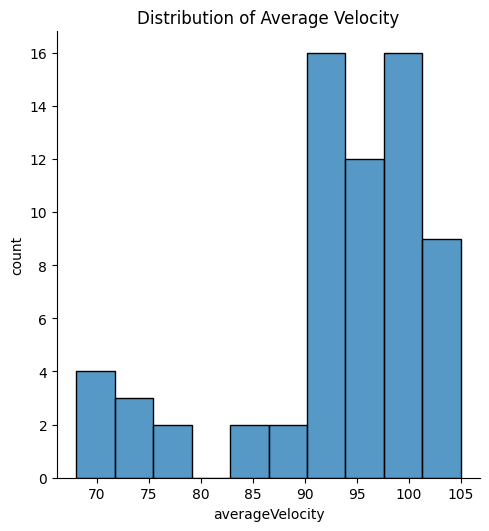

In [10]:
import seaborn as sns
sns.displot(vdf['평균속도'].values) 
plt.xlabel('averageVelocity')
plt.ylabel('count')
plt.title('Distribution of Average Velocity')
plt.show() # ~ normalized

In [11]:
vdf['평균속도'].values.min()

np.float64(68.0)

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

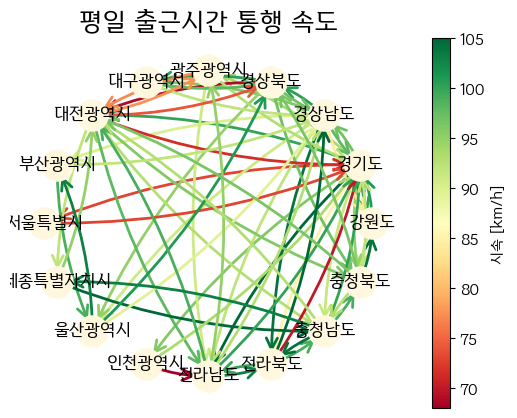

In [25]:
fig, ax = plt.subplots(1,1)
G = nx.Graph()
mpl.rcParams["font.family"] = 'Binggrae?'
cmap = plt.cm.RdYlGn
G.add_nodes_from(nodeList)
pos = nx.circular_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_size=500, node_color='#fff8de')
nx.draw_networkx_labels(G,pos,labels={i:i for i in nodeList},font_family='Binggrae?')
edges = nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edgeList,
    arrows=True,
    arrowstyle="->",
    connectionstyle='arc3,rad=0.1', # rad=0.1
    arrowsize=20,
    width=2,
    # edge_color=list(edge_colors),
    edge_color=vdf['평균속도'].values,
    edge_vmin=68,
    edge_vmax=105,
    edge_cmap=cmap
)

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(vdf['평균속도'].values)

ax = plt.gca()
ax.set_axis_off()
# norm = mpl.colors.Normalize(vmin=5, vmax=80)
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmapTraffic),
#              ax=ax, orientation='vertical', label='하루 평균 교통량 (천)', fraction=0.07, pad=0.05, location='left')
plt.colorbar(pc, ax=ax, label='시속 [km/h]')
plt.title('평일 출근시간 통행 속도', fontsize=18)
plt.show()

In [22]:
fig.savefig('평일출근시간통행속도.png')

In [160]:
# congested routes (~90km/h)
cdf = vdf[vdf['평균속도']<=90]
cdf

,출발노드주소,도착노드주소,평균속도
6,경기도,서울특별시,73.0
9,경기도,전라북도,85.0
12,경상남도,강원도,84.0
16,경상남도,부산광역시,90.0
22,경상북도,대전광역시,69.0
26,광주광역시,대전광역시,77.0
30,대전광역시,경기도,71.5
31,대전광역시,경상북도,74.0
32,대전광역시,광주광역시,77.5
39,서울특별시,경기도,73.0


In [165]:
import numpy as np
nodeListTemp = np.concatenate((cdf['출발노드주소'].values, cdf['도착노드주소'].values), axis=None)
nodeListTemp = np.unique(nodeListTemp)
nodeListTemp

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대전광역시', '부산광역시', '서울특별시',
       '울산광역시', '인천광역시', '전라남도', '전라북도'], dtype=object)

In [166]:
np.sort(nodeListTemp)

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대전광역시', '부산광역시', '서울특별시',
       '울산광역시', '인천광역시', '전라남도', '전라북도'], dtype=object)

In [162]:
edgeZip = zip(cdf['출발노드주소'],cdf['도착노드주소'])
edgeList = list(edgeZip)

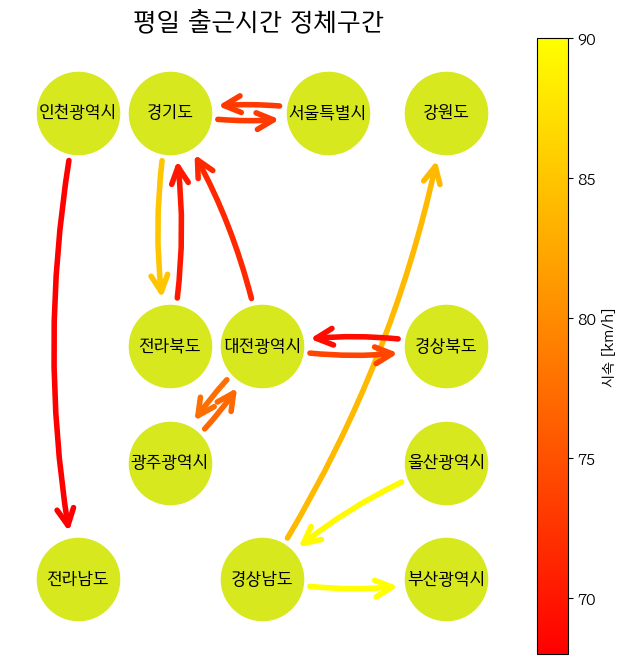

In [213]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
G = nx.Graph()
mpl.rcParams["font.family"] = 'Binggrae?'
cmap = plt.cm.autumn
G.add_nodes_from(nodeListTemp)
# pos = nx.circular_layout(G)
pos = {'강원도':(700,1000), '경기도':(175,1000), '경상남도':(350,0), '경상북도':(700,500),
       '광주광역시':(175,250), '대전광역시':(350,500), '부산광역시':(700,0), '서울특별시':(475,1000),
       '울산광역시':(700,250), '인천광역시':(0,1000), '전라남도':(0,0), '전라북도':(175,500)}       
       # '경상남도':(350,0),'충청남도':(50,675),'충청북도':(350,750),'대전광역시':(350,500),
       # ,'부산광역시':(700,0),,'강원도':(700,1000),
       # '광주광역시':(175,250),'세종특별자치시':(0,0),'경상북도':(700,500),'대구광역시':(350,250)}
nodes = nx.draw_networkx_nodes(G, pos, node_size=3500, node_color='#d7e81f') #alpha=0.5
nx.draw_networkx_labels(G,pos,labels={i:i for i in nodeListTemp},font_family='Binggrae?') #font_color='white'
edges = nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edgeList,
    arrows=True,
    arrowstyle="->",
    connectionstyle='arc3,rad=0.1', # rad=0.1
    arrowsize=30,
    width=4,
    # edge_color=list(edge_colors),
    edge_color=cdf['평균속도'].values,
    edge_vmin=68,
    edge_vmax=90,
    edge_cmap=cmap,
    min_target_margin=35,
    min_source_margin=35
)

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(cdf['평균속도'].values)
plt.margins(0.1,0.1)
ax = plt.gca()
ax.set_axis_off()
ticks = np.linspace(70,90,5)
plt.colorbar(pc, ax=ax, label='시속 [km/h]', ticks=ticks)
plt.title('평일 출근시간 정체구간', fontsize=18)
plt.show()

In [214]:
fig.savefig('평일출근시간정체구간.png')

In [158]:
G.nodes()

NodeView(('강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대전광역시', '부산광역시', '서울특별시', '울산광역시', '인천광역시', '전라남도', '전라북도'))

In [159]:
G.edges()

EdgeView([])

In [ ]:
G = nx.Graph()
mpl.rcParams["font.family"] = 'Binggrae?'
cmap = plt.cm.YlOrRd.reversed()
G.add_nodes_from(nodeListTemp)
# pos = nx.circular_layout(G)
pos = {'서울특별시':(400,1000),'경기도':(150,1000),'인천광역시':(0,700),'경상남도':(350,0),'충청남도':(50,675),'충청북도':(350,750),'대전광역시':(350,500),
       '울산광역시':(700,250),'부산광역시':(700,0),'전라북도':(150,500),'전라남도':(0,0),'강원도':(700,1000),
       '광주광역시':(175,250),'세종특별자치시':(0,0),'경상북도':(700,500),'대구광역시':(350,250)}
nodes = nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='#ccde1f', alpha=0.5)
nx.draw_networkx_labels(G,pos,labels={i:i for i in nodeList},font_family='Binggrae?')
edges = nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edgeList,
    arrows=True,
    arrowstyle="->",
    connectionstyle='arc3,rad=0.1', # rad=0.1
    arrowsize=30,
    width=4,
    # edge_color=list(edge_colors),
    edge_color=cdf['평균속도'].values,
    edge_vmin=68,
    edge_vmax=90,
    edge_cmap=cmap,
    min_target_margin=30,
    min_source_margin=30
)

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(cdf['평균속도'].values)
plt.margins(0.1,0.1)
ax = plt.gca()
ax.set_axis_off()
plt.colorbar(pc, ax=ax, label='시속 [km/h]')
plt.title('평일 출근시간 정체구간', fontsize=18)
plt.show()